Can we design an algorithm to spot active Minecraft players?

By Atlas Danks, Isabelle He, Aisa Rafei, and Steven Weng


In this project, we were tasked with data from a minecraft server being run by UBC Computer Science, and asked to find out which kinds of players were most likely to contribute the most data to this server, playing for long periods of time. 

To analyze this question, we used the `players.csv` file. This file lists all players who have signed up, as well as their gender, age, self-reported experience level, whether they have subscribed to the PLAIcraft email listing, as well as how many hours they have played. 

In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
library(readr)
driveurl <- "https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz"
players <- read_csv(url(driveurl))

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


However, we ran into some problems along the way. For example, the fact that the majority of players within this file had little to no recorded play time on the server.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


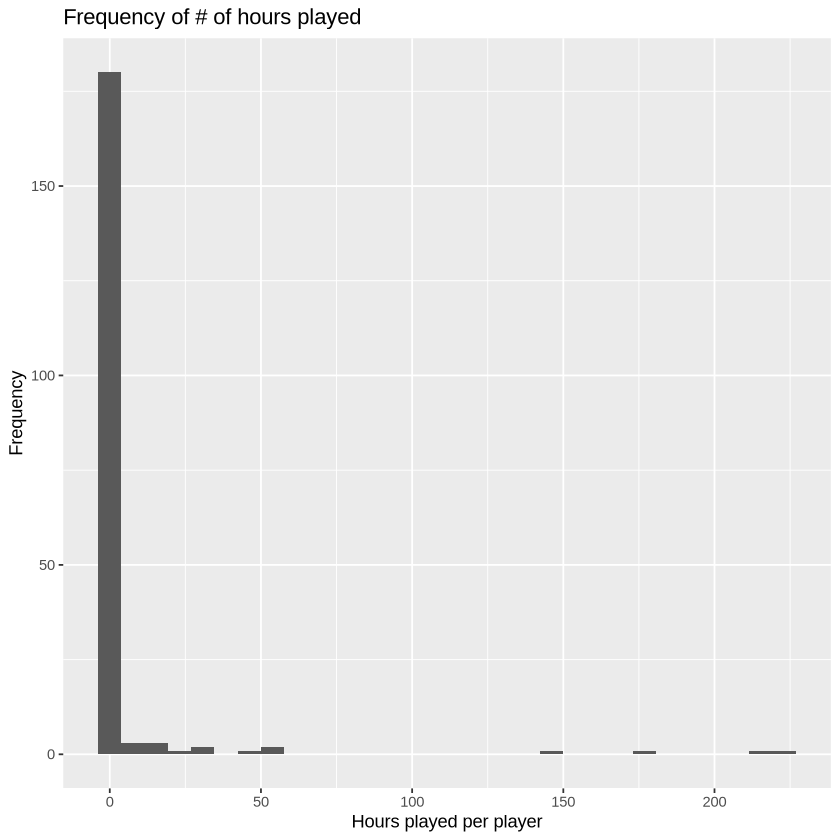

In [4]:
hours_histo <- ggplot(players, aes(played_hours)) + geom_histogram() + labs(x = "Hours played per player", y = "Frequency", title = "Frequency of # of hours played")
hours_histo

For this project, we worked with a linear regression algorithm to calculate the number of hours a player is likely to have played on the server. This algorithm was useful as it is good at working with limited sets of data, analyzing multiple variables, and filling in the blanks when needed, as we have some large gaps between difference players in play time. 

In [5]:
players_split <- players |>
initial_split(prop = 0.75, strata = played_hrs)  # No Answer - remove if you provide an answer

marathon_training <- training(players_split)
marathon_testing <- testing(players_split)

ERROR: Error in initial_split(players, prop = 0.75, strata = played_hrs): could not find function "initial_split"


Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age,sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23,3
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25,1
Amateur,TRUE,3caa832978e0596779f4ee7c686c4592fb6de893925025d25bf26be9a8cd03f5,0.2,Thatcher,Male,22,1
Amateur,TRUE,a175d4741dc84e6baf77901f6e8e0a06f54809a34e6b5211159bced346f7fb3e,48.4,Xander,Female,17,37


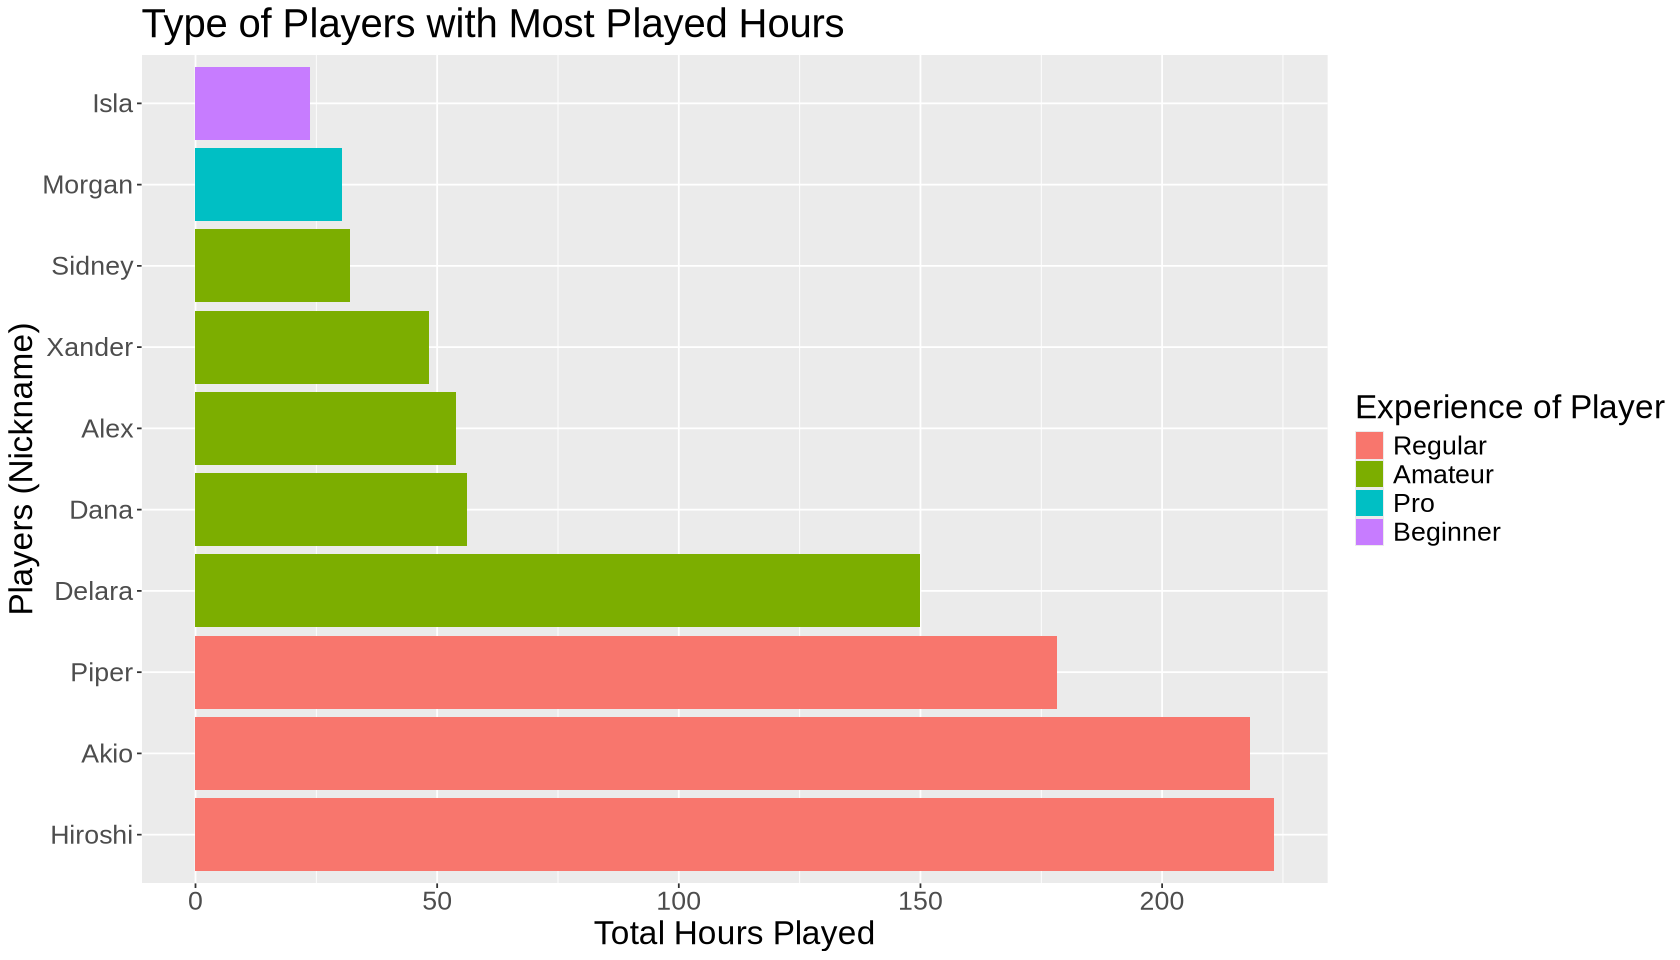

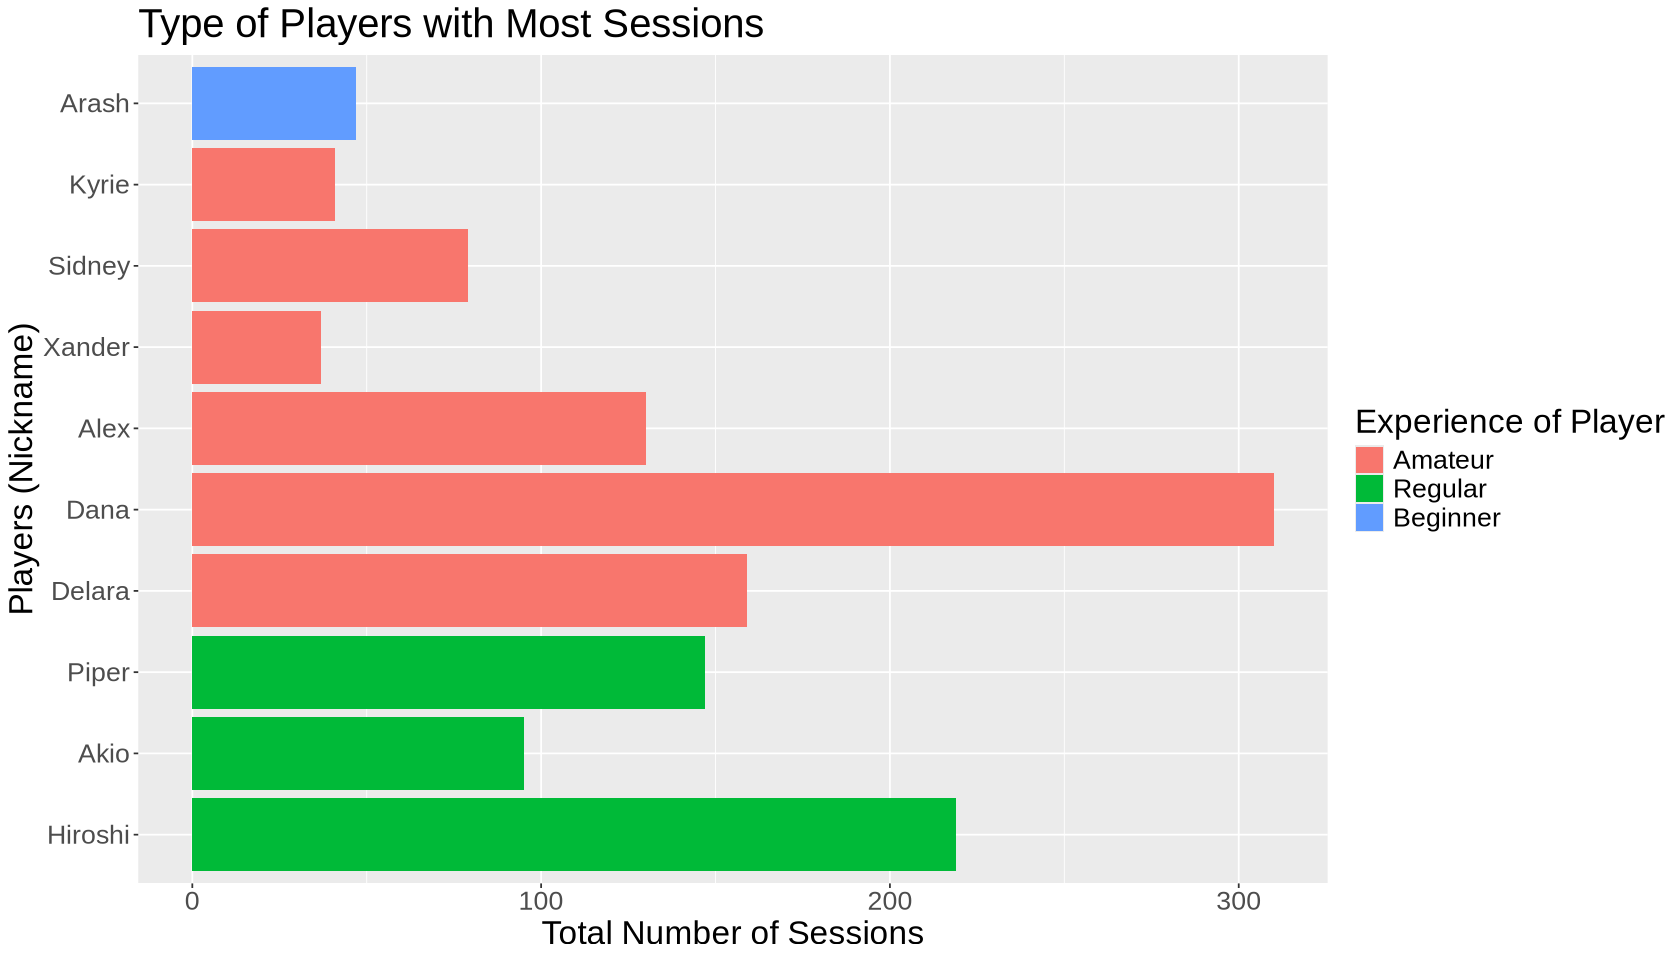

In [9]:
#Table Wrangling
players <- read_csv("https://drive.google.com/uc?export=download&id=1Mw9vW0hjTJwRWx0bDXiSpYsO3gKogaPz") |>
select(experience:age) |>
filter(played_hours != 0) #not interested in players that do not play and have 0 sessions

sessions <- read_csv("https://drive.google.com/uc?export=download&id=14O91N5OlVkvdGxXNJUj5jIsV5RexhzbB") 
sessions_per_player <- sessions |>
group_by(hashedEmail) |>
summarize(sessions = n()) |>
arrange(-sessions) 

players <- left_join(players, sessions_per_player, by = "hashedEmail")
players #final dataset made of both players.csv + wrangled session.csv

#top 10 players with most sessions
top_10_sessions <- players |>
arrange(-sessions) |>
slice(1:10)
#top_10_sessions

#top 10 players with most played hours
top_10_hours <- players |> 
arrange(-played_hours) |>
slice(1:10)
#top_10_hours

#Some visualisations
options(repr.plot.width = 14, repr.plot.height = 8)
#Type of Player with Most Played Hours Graph
ggplot(top_10_hours, aes(x = played_hours, y = fct_reorder(name, played_hours, .desc = TRUE), fill = as_factor(experience))) +
geom_bar(stat = "identity") + 
labs(x = "Total Hours Played",  y = "Players (Nickname)", fill = "Experience of Player") +
ggtitle("Type of Players with Most Played Hours") +
theme(text = element_text(size = 20))

#Type of Players with Most Sessions Graph
ggplot(top_10_sessions, aes(x = sessions, y = fct_reorder(name, played_hours, .desc = TRUE), fill = as_factor(experience))) + #sort by hours for easy comparision
geom_bar(stat = "identity") + 
labs(x = "Total Number of Sessions",  y = "Players (Nickname)", fill = "Experience of Player") +
ggtitle("Type of Players with Most Sessions") +
theme(text = element_text(size = 20))